# **World Cup 2023**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('deliveries.csv')

In [16]:
df.isnull().sum()

match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     25454
noballs                   26063
byes                      26081
legbyes                   25926
penalty                   26118
wicket_type               25390
player_dismissed          25390
other_wicket_type         26118
other_player_dismissed    26118
dtype: int64

## 1.**Runs Analysis**

### -Total Runs Scored in World Cup 23

In [4]:
t_runs = df['runs_off_bat'].sum() + df['extras'].sum() + df['wides'].sum() + df['byes'].sum() +df['legbyes'].sum() + df['noballs'].sum() + df['penalty'].sum()
print(f'Total runs scored in World Cup 2023 are ',t_runs)

Total runs scored in World Cup 2023 are  25851.0


### -Top 5 Run Scorer

In [22]:
pd.DataFrame(df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head())


,runs_off_bat
striker,
V Kohli,765
RG Sharma,597
Q de Kock,594
R Ravindra,578
DJ Mitchell,552


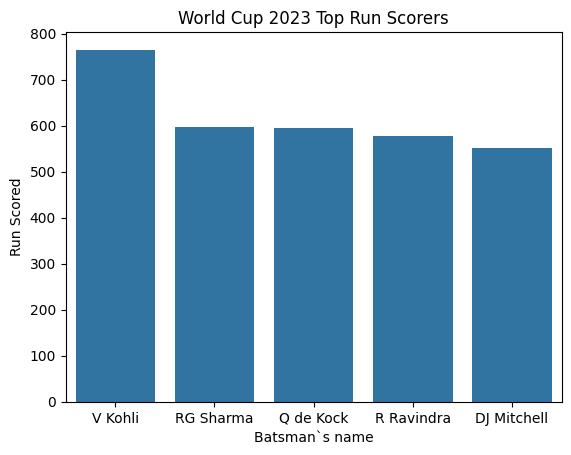

In [24]:
sns.barplot(df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head())
plt.title('World Cup 2023 Top Run Scorers')
plt.xlabel('Batsman`s name')
plt.ylabel('Run Scored')
plt.show()

### -Total runs scored by each team

In [6]:
pd.DataFrame(df.groupby('batting_team')['runs_off_bat'].count().sort_values(ascending=False))

,runs_off_bat
batting_team,
Australia,3121
India,3058
South Africa,2864
New Zealand,2696
Bangladesh,2516
Afghanistan,2459
Netherlands,2380
Pakistan,2372
England,2331


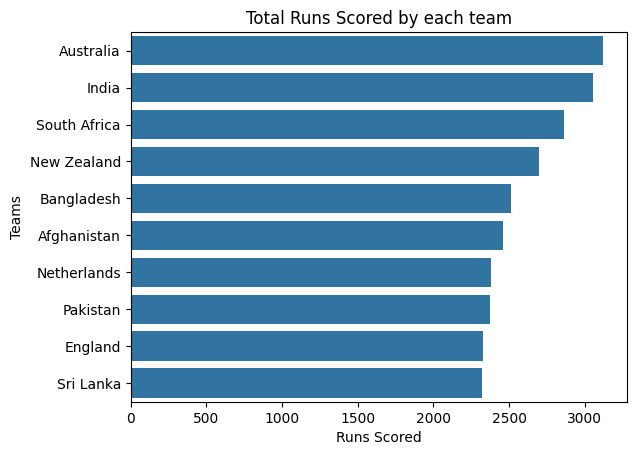

In [43]:
sns.barplot(df.groupby('batting_team')['runs_off_bat'].count().sort_values(ascending=False),orient='y')
plt.title('Total Runs Scored by each team')
plt.xlabel('Runs Scored')
plt.ylabel('Teams')
plt.show()

### -Analysis of Score in both innings

In [7]:
pd.DataFrame(df.groupby('innings')['runs_off_bat'].count())

,runs_off_bat
innings,
1,14395
2,11724


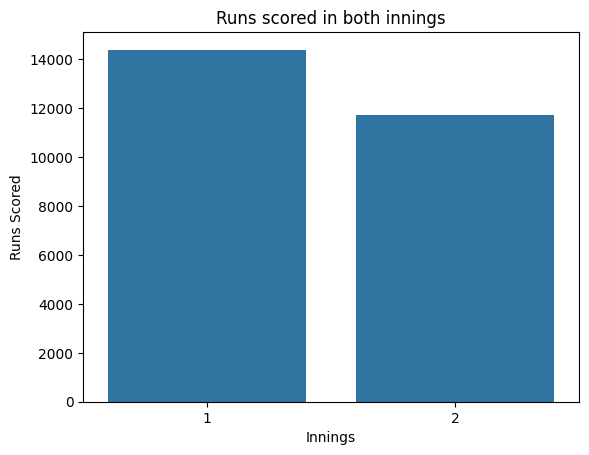

In [46]:
sns.barplot(df.groupby('innings')['runs_off_bat'].count())
plt.title('Runs scored in both innings')
plt.xlabel('Innings')
plt.ylabel('Runs Scored')
plt.show()

### -Average runs scored per inning across all matches

In [49]:
pd.DataFrame(df.groupby(['match_id', 'innings'])['runs_off_bat'].mean().round(2)).head(10)

runs_off_bat
match_id innings              
1        1                0.91
         2                1.24
2        1                0.92
         2                0.77
3        1                0.65
         2                0.70
4        1                1.29
         2                1.09
5        1                0.62
         2                0.76

### -Average runs scored per inning across all matches

In [9]:
df.groupby(['match_id', 'innings'])['runs_off_bat'].sum().mean()

244.03125

### -Highest Individual Scores

In [10]:
highest_individual_scores_in_each_match = df.groupby(['match_id', 'striker'])['runs_off_bat'].sum().reset_index()
max_scores_in_each_match = highest_individual_scores_in_each_match.groupby('match_id')['runs_off_bat'].max().sort_values(ascending=False)

dff = pd.DataFrame(max_scores_in_each_match)
dff.head()

,runs_off_bat
match_id,
39,201
43,177
23,174
18,163
1,152


### -Total run score in each match

In [11]:
pd.DataFrame(df.groupby(['match_id'])['runs_off_bat'].sum().sort_values(ascending=False))

,runs_off_bat
match_id,
27,736
4,711
46,687
8,649
45,632
18,628
23,588
43,585
7,577


## 2. **Wickets Analysis**

### -Total Wickets in World Cup 23

In [12]:
wickets = df['wicket_type'].count()
print(f'Total Wickets taken in World Cup 23 are ',wickets)

Total Wickets taken in World Cup 23 are  729


### -Top 5 Wicket Takers

In [13]:
df['bowler'].value_counts().head()

bowler
A Zampa          585
Kuldeep Yadav    575
JJ Bumrah        573
JR Hazlewood     572
TA Boult         565
Name: count, dtype: int64

### -Total wickets taken by each team

In [14]:
pd.DataFrame(df.groupby('bowling_team')['wicket_type'].count().sort_values(ascending=False))

,wicket_type
bowling_team,
India,100
Australia,93
South Africa,89
New Zealand,73
England,69
Pakistan,67
Netherlands,66
Afghanistan,61
Sri Lanka,57


### -Average number of wickets taken per match

In [15]:
df.groupby('match_id')['wicket_type'].count().mean()

15.1875